In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency

import sys
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import chi2,f_classif, mutual_info_classif, SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
import lightgbm as lgb
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import RobustScaler
from imblearn.combine import SMOTEENN
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.naive_bayes import ComplementNB, GaussianNB, MultinomialNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.feature_extraction import DictVectorizer

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Nhóm 3/Bài tập trên lớp/Báo cáo tiến trình/Project/feature_extraction.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35849 entries, 0 to 35848
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gioitinh              35849 non-null  int64  
 1   xeploai_tt            35849 non-null  int64  
 2   hocky                 35849 non-null  int64  
 3   namhoc                35849 non-null  int64  
 4   drltl                 35849 non-null  int64  
 5   sotchk                35849 non-null  int64  
 6   dtbhk_truoc           35849 non-null  float64
 7   xeploai               35849 non-null  int64  
 8   khuvuc_encoded        35849 non-null  int64  
 9   namnhaphoc            35849 non-null  int64  
 10  chuyennganh2_encoded  35849 non-null  float64
 11  hedt_encoded          35849 non-null  int64  
 12  khoa_encoded          35849 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 3.6 MB


In [8]:
X = df.drop(['xeploai'], axis =1)
y = df['xeploai']

In [9]:
resampler = SMOTEENN(sampling_strategy="auto", random_state=42)
X, y = resampler.fit_resample(X, y)

In [10]:
print("Resampled X shape:", X.shape)
print("Resampled y shape:", y.shape)

Resampled X shape: (44564, 12)
Resampled y shape: (44564,)


In [11]:
pip install tensorflow

# Deep learning

In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

num_classes = len(np.unique(y))

y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_val_one_hot = to_categorical(y_val, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)



input_layer = Input(shape=(X_train_scaled.shape[1],))

x_layer = Dense(128, activation='relu')(input_layer)
x_layer = Dropout(0.4)(x_layer)
x_layer = Dense(64, activation='relu')(x_layer)

output = Dense(num_classes, activation='softmax')(x_layer)
model = Model(inputs=input_layer, outputs=output)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

history = model.fit(
    X_train_scaled, y_train_one_hot,
    validation_data=(X_val_scaled, y_val_one_hot),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)


Epoch 1/100
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.4920 - loss: 1.2994 - val_accuracy: 0.6771 - val_loss: 0.7739 - learning_rate: 1.0000e-04
Epoch 2/100
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.6695 - loss: 0.7932 - val_accuracy: 0.6968 - val_loss: 0.6893 - learning_rate: 1.0000e-04
Epoch 3/100
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6888 - loss: 0.7338 - val_accuracy: 0.7074 - val_loss: 0.6629 - learning_rate: 1.0000e-04
Epoch 4/100
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7021 - loss: 0.6966 - val_accuracy: 0.7211 - val_loss: 0.6480 - learning_rate: 1.0000e-04
Epoch 5/100
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7069 - loss: 0.6856 - val_accuracy: 0.7213 - val_loss: 0.6397 - learning_rate: 1.0000e-04
Epoch 6/100
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7104 - loss: 0.6778 - val_accuracy: 0.7237 - val_loss: 0.6321 - learning_rate: 1.0000e-04
Epoch 7/100
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 2

In [13]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_one_hot)
print("Test accuracy:", test_accuracy)

140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7696 - loss: 0.5423
Test accuracy: 0.7646399140357971


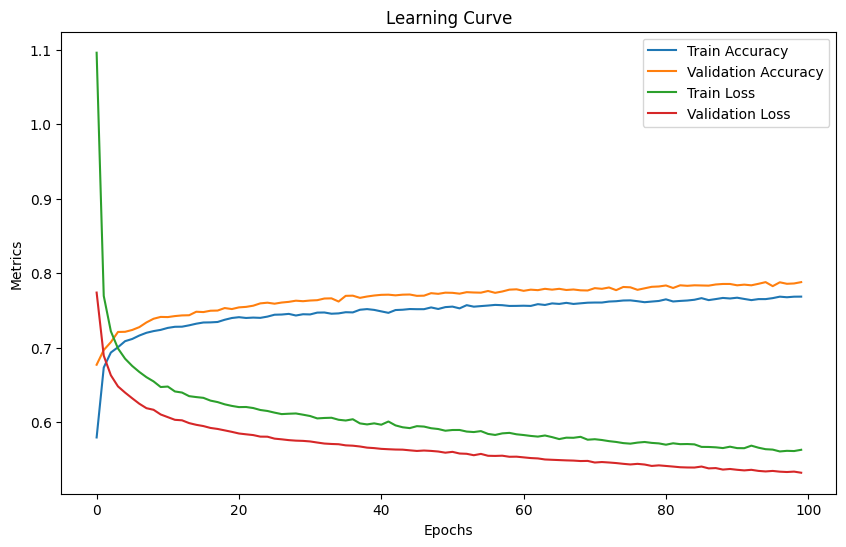

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Learning Curve")
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.show()
